In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
x_train = np.empty((0,5))
y_train = np.array([])

with open("Toy Dataset.csv","r") as f:
    d_reader = csv.reader(f,delimiter=",",quotechar="\"")
    first = True
    
    for line in d_reader:
        if first:
            first = False
            continue
        x_train = np.append(x_train,np.array(list(map(int,line[2:7]))).reshape((1,5)),axis=0)
        y_train = np.append(y_train,int(line[8]))
print(x_train.shape)
print(y_train.shape)
# print(y_train)

(419, 5)
(419,)


In [3]:
rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)

x_smote, y_smote = oversampler.fit_resample(x_train,y_train)

print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)

x_os, y_os = oversampler.fit_resample(x_train,y_train)

print(x_os.shape,y_os.shape)

(636, 5) (636,)
(636, 5) (636,)


In [4]:
"""
Trains a model using the given data and a hyperparameter search object

Parameters:
x_train - input data
y_train - target labels for data
hp_search - model_selection object

Returns: best estimator for the given data given the model selector
"""
def train_model(x_train,y_train,hp_search):
    hp_search.fit(x_train,y_train)
    print("Best Score: {:.4f}".format(hp_search.best_score_))
    for k,v in hp_search.best_params_.items():
        print("{} => {}".format(k,v))
    print("Splits: {}".format(hp_search.n_splits_))
    y_out = hp_search.predict(x_train)
    print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
    return hp_search.best_estimator_

In [5]:
# SVM, Grid Search
k_folds = 10
random_search_iterations = 200
parameters = {
    'C': np.logspace(-3, 2, 6), 
    'gamma': np.logspace(-3, 2, 6), 
    'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 
    'shrinking':[True, False], 
    'probability':[True, False]
}

svmc = svm.SVC()
random_search_svm = RandomizedSearchCV(svmc, parameters,n_iter=random_search_iterations,cv=k_folds,n_jobs=-1)

Random Oversampling:
Best Score: 0.3318
shrinking => True
probability => False
kernel => poly
gamma => 0.1
C => 100.0
Splits: 10
Accuracy: 34.1195%


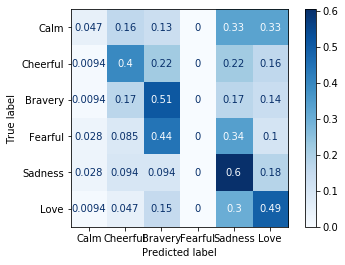

In [6]:
print("Random Oversampling:")
train_model(x_os,y_os,random_search_svm)
disp = plot_confusion_matrix(random_search_svm, x_os, y_os,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [ ]:
print("SMOTE:")
train_model(x_smote,y_smote,random_search_svm)
disp = plot_confusion_matrix(random_search_svm, x_smote, y_smote,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

SMOTE:


In [ ]:
# LinearSVM, Grid Search
k_folds = 10
random_search_iterations = 200
parameters = {
    'penalty':['l1', 'l2'],
    'loss':['hinge', 'squared_hinge'], 
    'dual':[True, False], 
    'C': np.logspace(-3, 2, 6), 
    'multi_class':['ovr', 'crammer_singer'], 
    'max_iter':[1000, 2500, 3000]
}

linearsvm = svm.LinearSVC()
random_search_linear = RandomizedSearchCV(linearsvm, parameters,n_iter=random_search_iterations,cv=k_folds,n_jobs=-1)

In [ ]:
print("Random Oversampling:")
train_model(x_os,y_os,random_search_linear)
disp = plot_confusion_matrix(random_search_linear, x_os, y_os,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [ ]:
print("SMOTE:")
train_model(x_smote,y_smote,random_search_linear)
disp = plot_confusion_matrix(random_search_linear, x_smote, y_smote,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')